<h6 style="text-align: right;">@author: ZaheerAhamad</h6>

<div>
  <h1 style="text-align: center;">Churn Analysis</h1>
    
 <h4 style="text-align: left;">The code is designed to analyze and process data from an iGaming company to predict customer churn, which refers to the likelihood that a customer will stop using the company's services. Initially, the code loads and preprocesses the data, which may involve handling missing values, normalizing or encoding categorical variables, and selecting important features for the model. Once the data is prepared, it trains an AI model, typically using machine learning algorithms, to identify patterns that indicate whether a player is likely to churn. After training, the model is used to predict churn status for current or future players, enabling the company to take proactive measures to retain customers. This predictive system helps the company make data-driven decisions to improve customer retention and overall business strategy.</h4>
  <h3 style="text-align: left;">Training Model using RandomForestClassifier & Saving it using joblib</h3>
   
</div>

In [ ]:

"""
@author: ZaheerAhamad
"""
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib  #for saving the model and reuse afterwards

# 1. Load the dataset
file_path = input('Enter data file path with file name')

if file_path.endswith('.xlsx'): 
    df = pd.read_excel(file_path,sheet_name='Sheet1')
elif file_path.endswith('.csv'):
    df = pd.read_csv(file_path)

# 2. Handle missing values (if any)
for col in df.columns:
    if df[col].isnull().sum() > 0:
        
        # Example of filling missing values with a specific value (e.g., 'Unknown' for strings or 0 for numbers)
        if df[col].dtype == 'object': # For categorical columns
            df[col].fillna('Unknown',inplace = True)
            
        else:  # For numerical columns
            df[col].fillna(df[col].mean(),inplace = True) # Filling with column mean
            
#print(f'Missing values: {df.isnull().sum()}')
#print(df)

# 3. Encode categorical variables
le = LabelEncoder()
categorical_cols = ['Game_Type', 'Region', 'Device_Type', 'Referral_Source', 'Churn_Status']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# 4. Define features and target
X = df.drop(['Player_ID', 'Registration_Date', 'Last_Active_Date', 'Churn_Status'], axis=1) #features to drop
y = df['Churn_Status'] #target

#print('Y::/n')
#print(y)

# 5. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Initialize and train the model
#model = LogisticRegression(max_iter=1000)
model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

# 7. Make predictions
y_pred = model.predict(X_test)


# 8. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('\n')


# 9. Save the model to a .pkl file
joblib.dump(model, 'churn_prediction_model.pkl')
print("Model saved as churn_prediction_model.pkl")


<h6 style="text-align: right;">@author: ZaheerAhamad</h6>
<div style="text-align: left;">
  <h3>Loading created Model & Predicting churn values</h3>
    
</div>

In [ ]:

"""
@author: ZaheerAhamad
"""
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib

from tkinter import Tk
from tkinter.filedialog import askopenfilename

# 1. Use tkinter to open a file dialog and let the user select the file
Tk().withdraw()  # We don't want a full GUI, so keep the root window from appearing
file_path = askopenfilename(title="Select the Excel file", filetypes=[("Excel files", "*.xlsx"),("CSV files", "*.csv")])


# Step1: loading new data
if file_path.endswith('xlsx'):
    df = pd.read_excel(file_path,sheet_name='Sheet1')
elif file_path.endswith('.csv'):
    df = pd.read_csv(file_path)
else:
    df = None
    print('No Proper file choosen')

# Step2: Preprocessing new data, for null/missing values
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object': #for categorical data
            df[col].fillna('NA',inplace = True)
            
        else:  #for nulerical data
            df[col].fillna(df[col].mean(), inplace = True)


# Step3: Converting categorical data into numerical for model processing
le = LabelEncoder()
categorical_cols = ['Game_Type', 'Region', 'Device_Type', 'Referral_Source']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


# Step4: Defining features or keeping only those cols which are required , dropping not required
X_new = df.drop(['Player_ID', 'Registration_Date', 'Last_Active_Date','Churn_Status'], axis=1)


# Step5: Load the model from the file
loaded_model = joblib.load('churn_prediction_model.pkl')

# Now you can use the loaded model to make predictions
predictions = loaded_model.predict(X_new)
print(f'Total values: {len(predictions)}, Result: {predictions}')
#print(predictions.dtype)


# To save result in an excel file
s = pd.Series(predictions) # Convert numPy array to series first
result = s.to_frame() #converting series to DF
result.columns = ['Predictate_Churn']
#print(result.dtypes)

fp = file_path.rfind('/') 

file_out = file_path[:fp+1] + 'out.xlsx'
print(file_out)
result.to_excel(file_out,index = False)



<h6 style="text-align: right;">@author: ZaheerAhamad</h6>

<div style="text-align: center;">
  <h1>Putting it all together</h1>
    
<h4 style="text-align: left;">The code demonstrates the application of Object-Oriented Programming (OOP) concepts by defining a class named igameAnalysis. This class encapsulates a range of methods designed for comprehensive analysis and processing of iGaming-related datasets.


Key features of the igameAnalysis class include:

<ul>
<li>Exploratory Data Analysis (EDA): Methods for performing EDA are included, which help in understanding the dataset by generating statistical summaries and visualizations.</li>
<li>Handling Missing Values: The class provides functionality to identify and address missing values in the dataset, ensuring that the data is clean and suitable for analysis.</li>
<li>Data Preprocessing: It includes methods for preprocessing the data, such as normalizing or encoding categorical variables, which are crucial for preparing the dataset for machine learning models.</li>
<li>Model Training and Prediction: The class also contains methods for training machine learning models and making predictions, such as predicting customer churn.</li>
</ul>
By organizing these functionalities into a class, the code achieves modularity and reusability, facilitating efficient and systematic analysis of the data.</h4>
    
</div>

In [6]:

"""
@author: ZaheerAhamad
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from datetime import datetime
from tkinter import filedialog

class igameAnalysis:
    
    def __init__(self):
        self.df = None
        self.file_path = None
    
    def dataload(self):
        
        # Create a tkinter root window (hidden)
        root = tk.Tk()
        root.withdraw()  # Hide the root window
        
        # Open file picker dialog
        self.file_path = filedialog.askopenfilename(
            title="Select a file",
            filetypes=[("Excel files", "*.xlsx"), ("CSV files", "*.csv"), ("All files", "*.*")]
        )
        
        if self.file_path:
            
            # Load data into dataframe
            if self.file_path.endswith(".xlsx"):
                self.df = pd.read_excel(self.file_path, sheet_name='Sheet1')
                self.preprocessing()
                
            elif self.file_path.endswith(".csv"):
                self.df = pd.read_csv(self.file_path)
                self.preprocessing()
                
            print(f"Data loaded from: {self.file_path} and Processed for Missing values")
            
        else:
            print("No file selected.")
            
    #Processing data before using
    def preprocessing(self):
        
        df = self.df
        for col in df.columns:
            if df[col].isnull().sum() > 0:
                
                if df[col].dtype == 'object':
                    df[col].fillna('NA', inplace = True)
                else:
                    df[col].fillna(df[col].mean(), inplace = True)
                    
            
    #Satistics-->descriptive analysis
    def descriptiveAnalysis(self):
        df = self.df
        
        while df is None:    
            print('No DataSet Found')
            self.dataload()
            df = self.df
            
        print('Satistics summary')
        #print(self.df.describe(include = 'all')) #include all , will give stats for all columns
        print(df.describe())


    #Checking for Missing values
    def chkMissing(self):
        df = self.df
        
        while df is None:    
            print('No DataSet Found')
            self.dataload()
            df = self.df
            
        print('Checking Missing values')
        print(df.isnull().sum())


    def EDA(self):
        df = self.df
        
        while df is None:    
            print('No DataSet Found')
            self.dataload()
            df = self.df
        
        print('Exploratory Data Analysis(EDA)')

        print('Step1: Distribution of Total Spend and Total Sessions')
        #Histogram of Total spend
        sns.histplot(df['Total_Spend'], bins=20,kde=True)
        plt.title('Distribution of Total Spend')
        plt.xlabel('Total Spend')
        plt.ylabel('Frequency')
        plt.show()

        #Histogram of Total Session
        sns.histplot(df['Total_Sessions'],bins=20,kde=True)
        plt.title('Distribution of Total Sessions')
        plt.xlabel('Total Sessions')
        plt.ylabel('Frequency')
        plt.show()

        print('\n')
        print('Step2: Game Type and Region Distribution')
        #game type distribution
        sns.countplot(data=df, x='Game_Type')
        plt.title('Distribution of Game Types')
        plt.xlabel('Game Type')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

        #Region Distribution
        sns.countplot(data=df, x='Region')
        plt.title('Distribution of Regions')
        plt.xlabel('Region')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

        print('\n')
        print('Step3: Correlation Analysis')
        #Convert categorical variables to numeric for correlation analysis
        df_numeric = df.copy()

        df_numeric['Game_Type'] = df_numeric['Game_Type'].astype('category').cat.codes
        df_numeric['Region'] = df_numeric['Region'].astype('category').cat.codes
        df_numeric['Device_Type'] = df_numeric['Device_Type'].astype('category').cat.codes
        df_numeric['Referral_Source'] = df_numeric['Referral_Source'].astype('category').cat.codes
        df_numeric['Churn_Status'] = df_numeric['Churn_Status'].map({'Yes': 1, 'No': 0})

        #Calculate correlation matrix
        cor_matrix = df_numeric.corr()

        #Heatmap for correlation
        sns.heatmap(cor_matrix,annot=True, cmap='coolwarm')
        plt.title('Correlation Matrix')
        plt.show()


    def train_Model_PredictiveAnalysis(self):
        df = self.df
        
        while df is None:    
            print('No DataSet Found')
            self.dataload()
            df = self.df
        
        print('Training Starts')
        df_numeric = df.copy()
        #print(df_numeric)
        
        # Converting categorical data into numerics for model
        categorical_cols = ['Game_Type', 'Region', 'Device_Type', 'Referral_Source','Churn_Status']
        for col in categorical_cols:
            df_numeric[col] = df_numeric[col].astype('category').cat.codes
        
        #------------#------------#------------#------------#------------#------------#------------#------------#
        #---------Can also do this way without loop, not a good practice-------------------#
        #df_numeric['Region'] = df_numeric['Region'].astype('category').cat.codes
        #df_numeric['Device_Type'] = df_numeric['Device_Type'].astype('category').cat.codes
        #df_numeric['Referral_Source'] = df_numeric['Referral_Source'].astype('category').cat.codes
        #df_numeric['Churn_Status'] = df_numeric['Churn_Status'].map({'Yes': 1, 'No': 0})
        
        #------------To deal with Dates, how can those be converted into number of days if needed.------------ #
        #------------For this anlaysis dates are not required--------------------------------------#
        #current_date = datetime(2024, 1, 1)  # Example of a current reference date
        # Calculate days since registration and last active
        #df_numeric['days_since_registration'] = (current_date - df_numeric['Registration_Date']).dt.days
        #df_numeric['days_since_last_active'] = (current_date - df_numeric['Last_Active_Date']).dt.days
        
        #------------#------------#------------#------------#------------#------------#------------#------------#
        
        # Dropping the irrelvant columns
        df_numeric = df_numeric.drop(['Registration_Date', 'Last_Active_Date', 'Player_ID'], axis=1)

        #prepare data for Model
        X = df_numeric.drop('Churn_Status',axis=1)
        y = df_numeric['Churn_Status']
        
        #Split data
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

        #Train the model
        model = RandomForestClassifier(n_estimators=100, random_state=0)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        #Evaluate Model
        print('Confusion Matrix:')
        print(confusion_matrix(y_test,y_pred))
        print('\n')
        print('Classification Report:')
        print(classification_report(y_test,y_pred))
        
        # Save the model to a .pkl file
        joblib.dump(model, 'churn_prediction_model.pkl')
        print("Model saved as churn_prediction_model.pkl")


    def churnRate(self):
        df = self.df
        
        while df is None:    
            print('No DataSet Found')
            self.dataload()
            df = self.df
            

        print('User behaviour Analysis')
        #Churn Rate by Game Type
        df['Churn_StatusN'] = df['Churn_Status'].map({'Yes': 1, 'No': 0})

        churn_gt = df.groupby('Game_Type')['Churn_StatusN'].mean()
        print(f'Churn rate by game type: {churn_gt}')
        print('\n')

        #Churn Rate by Region
        churn_rg = df.groupby('Region')['Churn_StatusN'].mean()
        print(f'Churn Rate by Region: {churn_rg}')
        print('\n')

        print('Visualization of Churn Rate')
        # Churn Rate by Game Type
        sns.barplot(x=churn_gt.index, y=churn_gt.values)
        plt.title('Churn Rate by Game Type')
        plt.xlabel('Game Type')
        plt.ylabel('Churn Rate')
        plt.xticks(rotation=45)
        plt.show()

        # Churn Rate by Region
        sns.barplot(x=churn_rg.index, y=churn_rg.values)
        plt.title('Churn Rate by Region')
        plt.xlabel('Region')
        plt.ylabel('Churn Rate')
        plt.xticks(rotation=45)
        plt.show()
        
        
    def PredictChurn(self):
        df = self.df
        
        while df is None:    
            print('No DataSet Found')
            self.dataload()
            df = self.df
            
        print('Predicting Started')
        
        file_path = self.file_path
        
        # Converting categorical data into numerical for model processing
        le = LabelEncoder()
        categorical_cols = ['Game_Type', 'Region', 'Device_Type', 'Referral_Source']

        for col in categorical_cols:
            df[col] = le.fit_transform(df[col])


        # Defining features or keeping only those cols which are required , dropping not required
        X_new = df.drop(['Player_ID', 'Registration_Date', 'Last_Active_Date','Churn_Status'], axis=1)

        
        try:
            # Load the model from the file
            loaded_model = joblib.load('churn_prediction_model.pkl')
        
        except FileNotFoundError:
            print('Model is not Trained yet, Training Model Now.')
            self.train_Model_PredictiveAnalysis()
            # Load the model from the file
            loaded_model = joblib.load('churn_prediction_model.pkl')
            
            
        # Now you can use the loaded model to make predictions
        predictions = loaded_model.predict(X_new)
        print(f'Total values: {len(predictions)}, Result: {predictions}')
        #print(predictions.dtype)


        # To save result in an excel file
        s = pd.Series(predictions) # Convert numPy array to series first
        result = s.to_frame() #converting series to DF
        result.columns = ['Predictated_Churn']
        #print(result.dtypes)

        fp = file_path.rfind('/') 

        file_out = file_path[:fp+1] + 'out.xlsx'
        print(file_out)
        result.to_excel(file_out,index = False)

<h6 style="text-align: right;">@author: ZaheerAhamad</h6>

<div style = "text-align: left;">
<h4>We begin by creating an instance of the igameAnalysis class, which is designed to facilitate comprehensive analysis and prediction tasks on iGaming datasets. Using this instance, we invoke the PredictChurn() & EDA() method to generate predictions regarding customer churn and few charts for analsysis.

The predictions are then saved into a new Excel file, located in the same directory as the input file. The churn status is encoded in numeric form, where 1 represents a prediction of churn (Yes) and 0 represents no churn (No). This numeric encoding aligns with the preprocessing of categorical data performed for model training.

Optionally, you can retain the categorical codes for the target column if you prefer. These codes effectively convey the prediction results in a format consistent with the data processing pipeline.</h4>
    
</div>

No DataSet Found
Data loaded from: D:/iGaming/DataG.xlsx and Processed for Missing values
Predicting Started
Total values: 100, Result: [0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0
 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
D:/iGaming/out.xlsx
Exploratory Data Analysis(EDA)
Step1: Distribution of Total Spend and Total Sessions


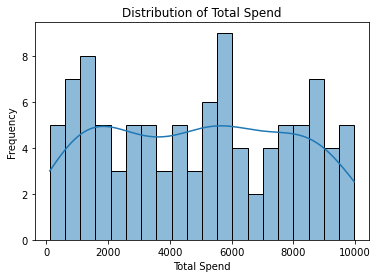

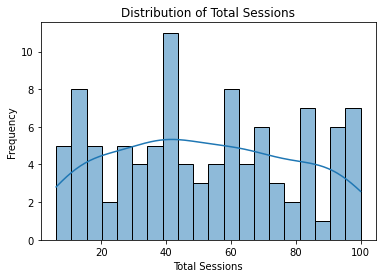



Step2: Game Type and Region Distribution


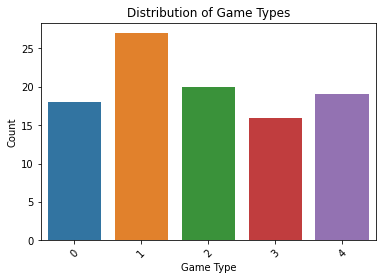

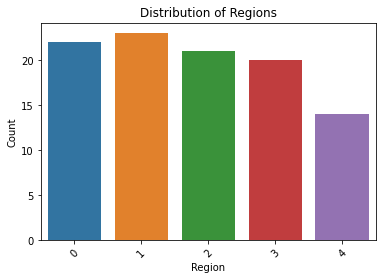



Step3: Correlation Analysis


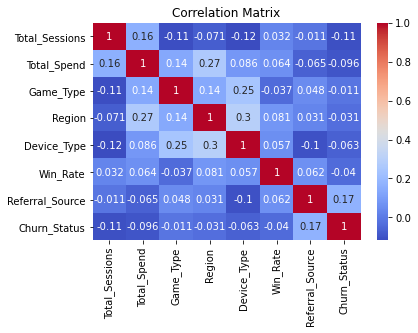

In [8]:
"""
@author: ZaheerAhamad
"""
analysis = igameAnalysis() #creating an object of igame calss
#calling a method from the class
analysis.PredictChurn()
analysis.EDA()


<h6 style="text-align: right;">@author: ZaheerAhamad</h6>